In [13]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [14]:
import numpy as np
import pandas as pd

In [15]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [ ]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import datetime as dt

In [ ]:
engine = create_engine("sqlite:///hawaii.sqlite")
Base = automap_base()

In [ ]:
# reflect an existing database into a new model
Base.prepare(engine, reflect=True)
# reflect the tables


In [ ]:
# We can view all of the classes that automap found
Base.classes.keys()

In [ ]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [ ]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

      date  precipitation
2017-08-23           0.45
2017-08-23           0.08
2017-08-23           0.00
2017-08-23           0.00
2017-08-22           0.00
2017-08-22           0.00
2017-08-22           0.50
2017-08-21           0.02
2017-08-21           0.56
2017-08-21            NaN
2017-08-21           0.00
2017-08-20            NaN
2017-08-20           0.00
2017-08-20           0.01
2017-08-19           0.09
2017-08-19           0.00
2017-08-19            NaN
2017-08-19           0.00
2017-08-18           0.00
2017-08-18           0.06
2017-08-18           0.00
2017-08-18            NaN
2017-08-17           0.00
2017-08-17           0.05
2017-08-17           0.01
2017-08-17           0.13
2017-08-16           0.07
2017-08-16           0.12
2017-08-16           0.00
2017-08-16           0.42
2017-08-15           0.32
2017-08-15           0.00
2017-08-15           0.02
2017-08-15           0.06
2017-08-15           0.42
2017-08-14           0.00
2017-08-14           0.01
2017-08-14  

<AxesSubplot:xlabel='date'>

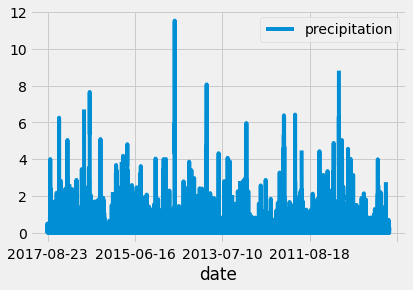

In [20]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 
prev_year = dt.date(2017, 8, 23)
# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp)
#print(results.all())
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])

# Sort the dataframe by date
df.set_index(df['date'], inplace=True)
#print(df)
#print(df.to_string(index=False))
df = df.sort_index(ascending = False)
print(df.to_string(index=False))
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()

In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


In [ ]:
# How many stations are available in this dataset?


In [ ]:
# What are the most active stations?
# List the stations and the counts in descending order.


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [ ]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge